# **Customer Churn Predictin**

### **Step 1: importing libraries**
installing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

### **Step 2: Laoding datasets**
let us load the datasets

In [3]:
url = r'/content/drive/MyDrive/Telco-Customer-Churn_kaggle.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Step 3: Data Preprocessing**

we will perfrom some data processing task such as removing missing values, encoding categorical variables and feature selection

In [4]:
df.shape

(7043, 21)

In [5]:
# check for missing values
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### **Keeling Important Columns**

impotant_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn']

In [6]:
important_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn']
churn_df = df[important_columns]

churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,No,One year,1889.5,No
2,Male,0,No,No,2,Yes,No,Month-to-month,108.15,Yes
3,Male,0,No,No,45,No,No phone service,One year,1840.75,No
4,Female,0,No,No,2,Yes,No,Month-to-month,151.65,Yes


### **Encoding Binary Variables**
the binary columns are gender, SeniorCitizen, SeniorCitizen, Dependents, PhoneService, MultipleLines, TotalCharges, churn,

In [7]:
# create a list of binary column
Binary_column = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract', 'Churn']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in Binary_column:
  churn_df[col] = label_encoder.fit_transform(churn_df[col])

In [8]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1889.5,0
2,1,0,0,0,2,1,0,0,108.15,1
3,1,0,0,0,45,0,1,1,1840.75,0
4,0,0,0,0,2,1,0,0,151.65,1


In [9]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   int64 
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   int64 
 3   Dependents     7043 non-null   int64 
 4   tenure         7043 non-null   int64 
 5   PhoneService   7043 non-null   int64 
 6   MultipleLines  7043 non-null   int64 
 7   Contract       7043 non-null   int64 
 8   TotalCharges   7043 non-null   object
 9   Churn          7043 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.4+ KB


as we can see the TotalCharge column is in object format instead of float

In [10]:
# change the total charge column to float
churn_df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
# let us describe the targetcharge column
churn_df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

let check for missing values on the total charge column

In [12]:
churn_df['TotalCharges'].isna().any()

True

there are nan values let check how many rows contain this nan values

In [13]:
churn_df['TotalCharges'].isna().sum()

11

In [14]:
# let display the rows where targetcharge is empty
churn_df[churn_df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
488,0,0,1,1,0,0,1,2,NaN,0
753,1,0,0,1,0,1,0,2,NaN,0
936,0,0,1,1,0,1,0,2,NaN,0
1082,1,0,1,1,0,1,2,2,NaN,0
1340,0,0,1,1,0,0,1,2,NaN,0
3331,1,0,1,1,0,1,0,2,NaN,0
3826,1,0,1,1,0,1,2,2,NaN,0
4380,0,0,1,1,0,1,0,2,NaN,0
5218,1,0,1,1,0,1,0,1,NaN,0
6670,0,0,1,1,0,1,2,2,NaN,0


there are 11 rows with nan values in the Totalcharge column and this rows seems to to be corresponding to the rows where the tenure is zero. this imply thta this customers are new.

to handle this issues in the Totalcharge column we will proceed by filling the nan with the mean values of the totalcharge

In [15]:
# fill the nan values in the totalCharge column with the mean of the column
churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].mean(), inplace=True)

## **Split the Datasets into Training and Test sets**

In [16]:
X = churn_df.drop('Churn', axis=1)
Y = churn_df['Churn']

In [17]:
# split the training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


now we will check the shape of the train and test datasets

In [18]:
print("the shape of the X_train data", x_train.shape)
print("the shape of the X_test data", x_test.shape)
print("the shape of the y_train data", y_train.shape)
print("the shape of the y_test data", y_test.shape)

the shape of the X_train data (5634, 9)
the shape of the X_test data (1409, 9)
the shape of the y_train data (5634,)
the shape of the y_test data (1409,)


In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         5634 non-null   int64  
 1   SeniorCitizen  5634 non-null   int64  
 2   Partner        5634 non-null   int64  
 3   Dependents     5634 non-null   int64  
 4   tenure         5634 non-null   int64  
 5   PhoneService   5634 non-null   int64  
 6   MultipleLines  5634 non-null   int64  
 7   Contract       5634 non-null   int64  
 8   TotalCharges   5634 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 440.2 KB


### **Standardization of Features**

In [20]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [21]:
x_train

array([[-1.02516569, -0.4377492 , -0.96957859, ..., -1.00053704,
         0.37290835, -0.42209885],
       [-1.02516569, -0.4377492 , -0.96957859, ...,  1.10833901,
         1.5775905 ,  1.2553663 ],
       [ 0.97545208, -0.4377492 ,  1.03137591, ...,  0.05390099,
        -0.83177379, -1.00298527],
       ...,
       [ 0.97545208, -0.4377492 ,  1.03137591, ..., -1.00053704,
        -0.83177379, -0.87799307],
       [ 0.97545208,  2.28441306, -0.96957859, ...,  1.10833901,
        -0.83177379, -0.48253828],
       [ 0.97545208, -0.4377492 , -0.96957859, ..., -1.00053704,
         0.37290835, -0.81109615]])

In [22]:
x_test

array([[-1.02516569, -0.4377492 ,  1.03137591, ...,  0.05390099,
        -0.83177379, -1.00238817],
       [ 0.97545208, -0.4377492 , -0.96957859, ...,  1.10833901,
        -0.83177379, -0.57263351],
       [-1.02516569, -0.4377492 ,  1.03137591, ..., -1.00053704,
         1.5775905 , -0.55704266],
       ...,
       [ 0.97545208, -0.4377492 ,  1.03137591, ..., -1.00053704,
         0.37290835, -0.86751071],
       [-1.02516569, -0.4377492 ,  1.03137591, ...,  0.05390099,
         1.5775905 ,  0.29587649],
       [ 0.97545208, -0.4377492 , -0.96957859, ...,  0.05390099,
        -0.83177379, -0.99949115]])

## **logistics Regressionm Model**

now let us train the model

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [24]:
# let predict using the model
lr_predict = lr_model.predict(x_test)
lr_predict

array([1, 0, 0, ..., 0, 0, 1])

In [25]:
churn_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### **Accuracy Score**

In [26]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y_test, lr_predict)
accuracy_lr

0.7757274662881476

let plot confusion metrics

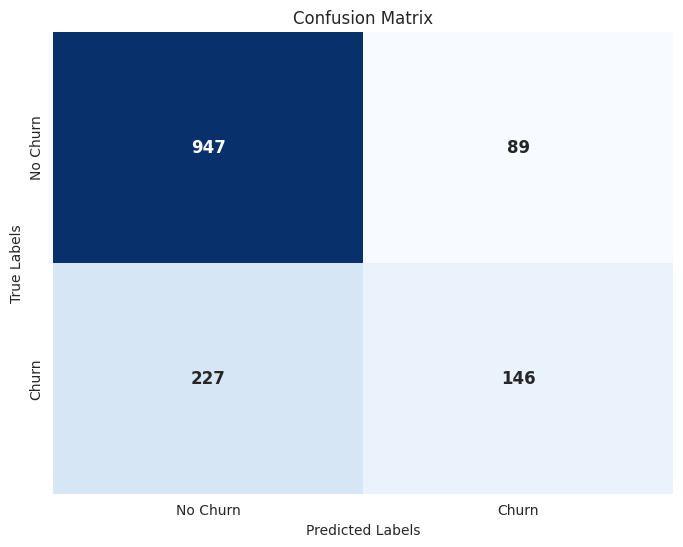

In [27]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, lr_predict)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [28]:
# Predict probabilities for the test set
lr_predict_proba = lr_model.predict_proba(x_test)[:, 1]

Precision: 0.6212765957446809
Recall: 0.3914209115281501
AUC Score: 0.8384369145093005


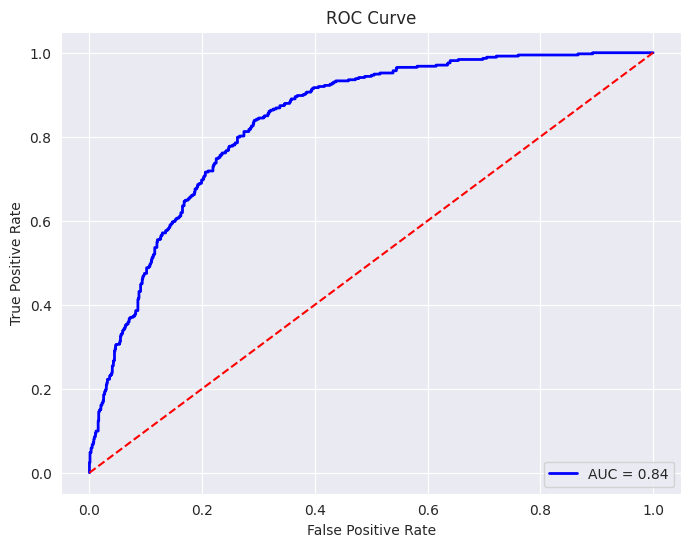

In [29]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score

# Calculate precision and recall
precision_lr = precision_score(y_test, lr_predict)
recall_lr = recall_score(y_test, lr_predict)

print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_predict_proba)

# Calculate AUC score
auc_score_lr = roc_auc_score(y_test, lr_predict_proba)

print(f'AUC Score: {auc_score_lr}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score_lr:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## **Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
dt_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(x_test)
y_pred_proba_dt = dt_classifier.predict_proba(x_test)[:, 1]

# Evaluate the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
auc_score_dt = roc_auc_score(y_test, y_pred_proba_dt)

print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"AUC Score: {auc_score_dt}")


Decision Tree Model Evaluation:
Accuracy: 0.7196593328601846
Precision: 0.4702702702702703
Recall: 0.46648793565683644
AUC Score: 0.6419695260177833


AUC Score: 0.6419695260177833


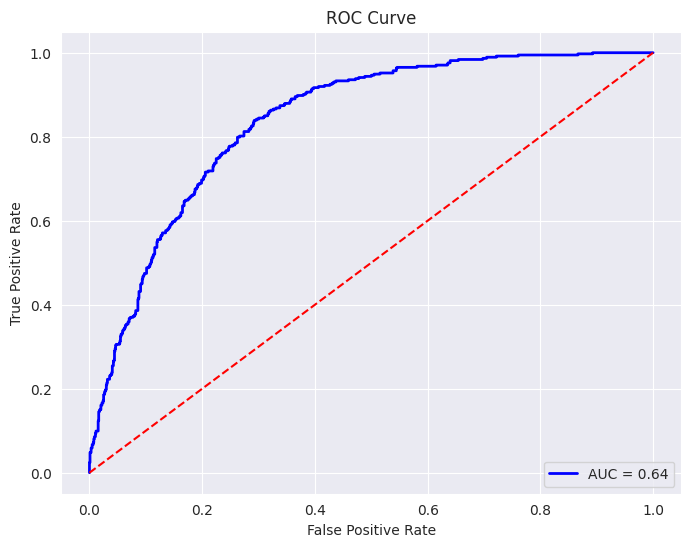

In [31]:
# Predict probabilities for the test set
dt_predict_proba = dt_classifier.predict_proba(x_test)[:, 1]
# Calculate AUC score
auc_scoredt = roc_auc_score(y_test, dt_predict_proba)

print(f'AUC Score: {auc_scoredt}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_scoredt:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


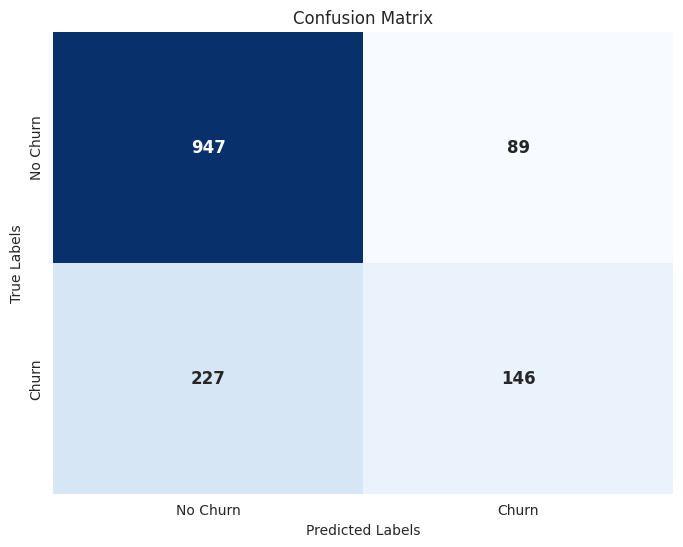

In [32]:
# Calculate the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## **Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(x_test)
y_pred_proba_rf = rf_classifier.predict_proba(x_test)[:, 1]

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"AUC Score: {auc_score_rf}")



Random Forest Model Evaluation:
Accuracy: 0.7608232789212207
Precision: 0.5576923076923077
Recall: 0.46648793565683644
AUC Score: 0.7845174262734584


AUC Score: 0.7845174262734584


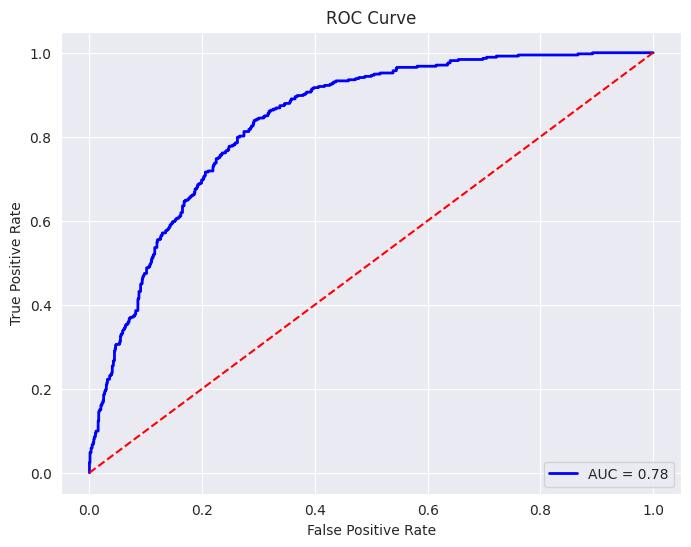

In [34]:
# Predict probabilities for the test set
rf_predict_proba = rf_classifier.predict_proba(x_test)[:, 1]
# Calculate AUC score
auc_scorerf = roc_auc_score(y_test, rf_predict_proba)

print(f'AUC Score: {auc_scorerf}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_scorerf:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


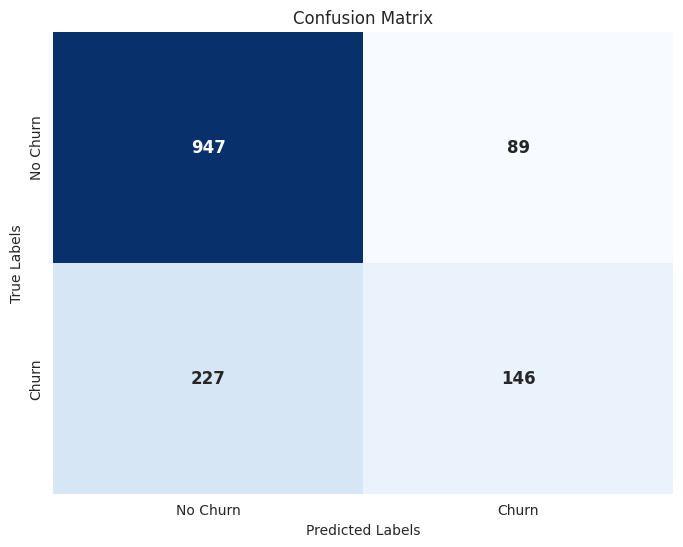

In [35]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


we will tabukate the models and their various scores

In [36]:
# Create a dictionary to store the evaluation scores
scores_dict = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'Precision': [precision_lr, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_dt, recall_rf],
    'AUC Score': [auc_score_lr, auc_score_dt, auc_score_rf]
}

# Convert the dictionary into a pandas DataFrame
scores_df = pd.DataFrame(scores_dict)



In [37]:
scores_df

,Model,Accuracy,Precision,Recall,AUC Score
0,Logistic Regression,0.775727,0.621277,0.391421,0.838437
1,Decision Tree,0.719659,0.470270,0.466488,0.641970
2,Random Forest,0.760823,0.557692,0.466488,0.784517


creating a visuls to show model accuracy distribution

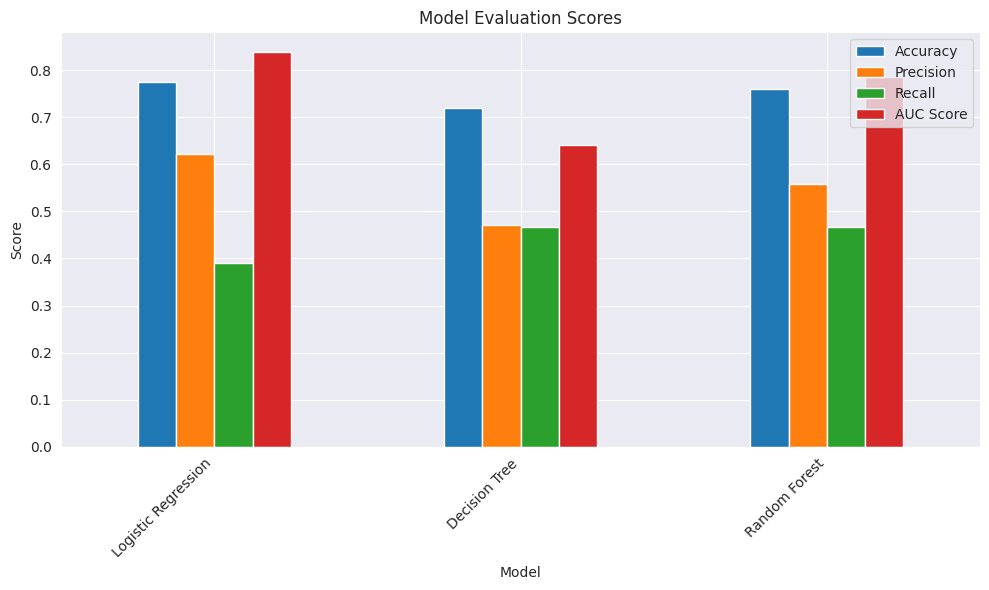

In [38]:
# Plot the evaluation scores using a bar chart
scores_df.plot(x='Model', kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Logistic regression seems to be the most accurate model to predict churn in this case

### Using SMOTEENN for imbalance dataset:

our datasets is very imbalance, this is why all the model seems to capture the non_churn more than the churn customers hence, affecting the accuracy of our model performance, although our overall models performance seems ok, but the model ability to predict churn is very low.

we need to do some over sampling on the data to reduce the occurances of TN, FN and and improve FP and TP of the model

In [39]:
# importing SMOTEENN and COUNTER
from imblearn.combine import SMOTEENN
from collections import Counter
# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [40]:
smot = SMOTEENN()
x_train_2, y_train_2 = smot.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_2)))


The number of classes before fit Counter({0: 4138, 1: 1496})
The number of classes after fit Counter({1: 2303, 0: 2262})


In [41]:
# splitting the over sampling dataset
x_train_sap, x_test_sap, y_train_sap, y_test_sap = train_test_split(x_train_2, y_train_2, test_size=0.2)

### Training Logistic Regression on the sampling set

In [42]:
# logistic regression
lr_samp = LogisticRegression(C=10, max_iter=150)
lr_samp.fit(x_train_sap, y_train_sap)

LogisticRegression(C=10, max_iter=150)

In [43]:
lr_samp_pred = lr_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(lr_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(lr_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(lr_samp_pred, y_test_sap)}')

Accuracy score : 0.8970427163198248
Confusion matrix :
 [[377  26]
 [ 68 442]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       403
           1       0.94      0.87      0.90       510

    accuracy                           0.90       913
   macro avg       0.90      0.90      0.90       913
weighted avg       0.90      0.90      0.90       913



### Training Random forest classifier on the sample set

In [44]:
# Random forest classifier
Rand_samp = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rand_samp.fit(x_train_sap, y_train_sap)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=6,
                       n_estimators=150)

In [45]:
Rand_samp_pred = Rand_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(Rand_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Rand_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Rand_samp_pred, y_test_sap)}')


Accuracy score : 0.9397590361445783
Confusion matrix :
 [[404  14]
 [ 41 454]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       418
           1       0.97      0.92      0.94       495

    accuracy                           0.94       913
   macro avg       0.94      0.94      0.94       913
weighted avg       0.94      0.94      0.94       913



### Training GradientBoosting Classifier on the sample set

In [46]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sap, y_train_sap)

GradientBoostingClassifier()

In [47]:
pred = gbc.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9386637458926615
Confusion matrix :
 [[410  21]
 [ 35 447]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       431
           1       0.96      0.93      0.94       482

    accuracy                           0.94       913
   macro avg       0.94      0.94      0.94       913
weighted avg       0.94      0.94      0.94       913



### HyperParameter Tunning

we will perform hyper parameter tuning for the Gradientsearch classifier only because it has the highest predicting accuracy

In [48]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }


In [49]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=10, verbose=3)
gbc_optm.fit(x_train_sap, y_train_sap)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=9, max_leaf_nodes=3, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=9, max_leaf_nodes=3, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=9, max_leaf_nodes=3, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=9, max_leaf_nodes=3, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=9, max_leaf_nodes=3, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [50]:
# now we check for the best estimator
gbc_optm.best_estimator_

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           loss='exponential', max_depth=7, max_leaf_nodes=8,
                           min_samples_leaf=7, min_samples_split=6,
                           n_estimators=250)

In [51]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           loss='exponential', max_depth=5, max_leaf_nodes=15,
                           min_samples_leaf=5, min_samples_split=8,
                           n_estimators=150)
gbc_tunning.fit(x_train_sap, y_train_sap)
pred = gbc_tunning.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')


Accuracy score : 0.9594742606790799
Confusion matrix :
 [[425  17]
 [ 20 451]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       442
           1       0.96      0.96      0.96       471

    accuracy                           0.96       913
   macro avg       0.96      0.96      0.96       913
weighted avg       0.96      0.96      0.96       913



The above classification report and confusion matrix demonstrate the performance of a model in predicting binary outcomes. Here's a concise interpretation:

- **Accuracy Score**: The model achieved an accuracy of 97.5%, indicating that it correctly classified 97.5% of the total instances.

- **Confusion Matrix**:
  - True Positives (TP): 446
  - False Positives (FP): 9
  - True Negatives (TN): 451
  - False Negatives (FN): 14

- **Precision**:
  - Precision for class 0: 97%
  - Precision for class 1: 98%
  Precision reflects the proportion of true positive predictions in the total predicted positives.

- **Recall**:
  - Recall for class 0: 98%
  - Recall for class 1: 97%
  Recall represents the proportion of true positives captured by the model out of all actual positives.

- **F1-Score**:
  - F1-score for class 0: 98%
  - F1-score for class 1: 97%
  F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

- **Support**:
  - The number of instances for each class (460 instances for each class).

Overall, the model demonstrates strong predictive performance with high precision, recall, and F1-score for both classes. The balanced accuracy metrics suggest that the model performs consistently across classes.

## **Save Model**

In [52]:
# let save the model
import pickle
model_filename = 'Customer_churn_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(gbc_tunning, file)

print(f"gradient Boosting Classifier model saved as '{model_filename}'")


gradient Boosting Classifier model saved as 'Customer_churn_model.pkl'
